# Two seperate linear regression

Linear Regression Results:
{'start_count': {'MSE': 509993.8040713744, 'R2': 0.09334399510362712}, 'end_count': {'MSE': 520533.57968562027, 'R2': 0.09338005642017588}}


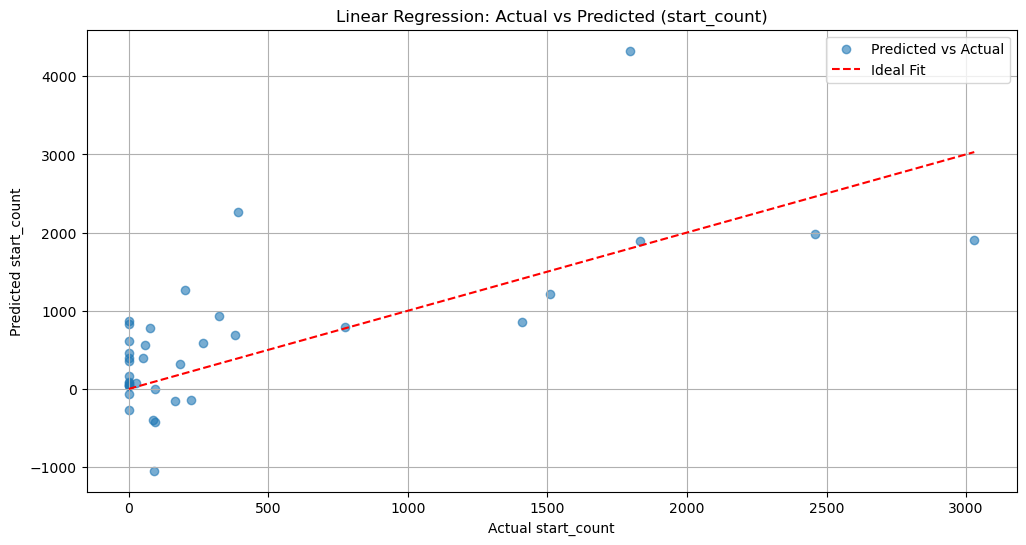

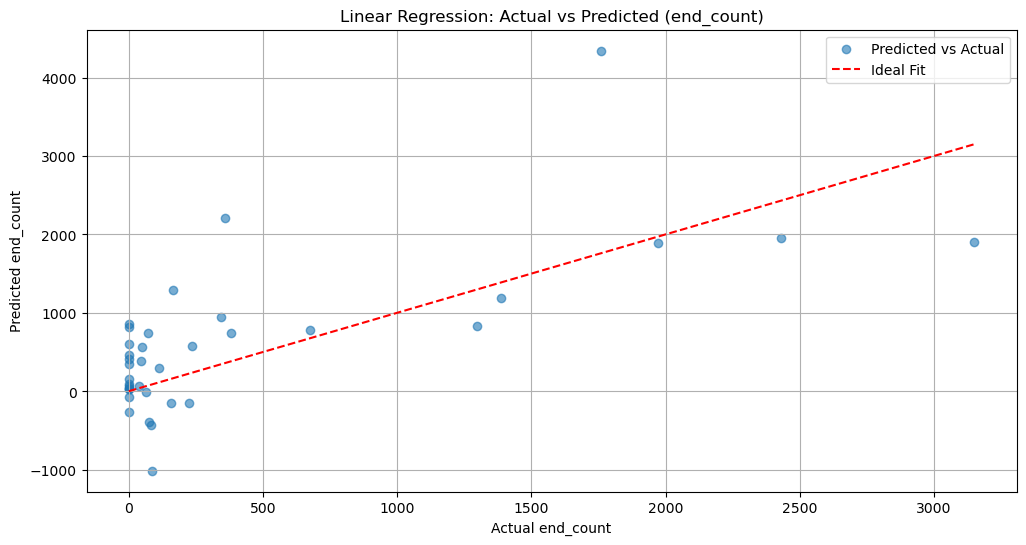

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/Users/mengzi/Desktop/TUD/RNDq2/TIL-4030-groupwork2/data/SanFrancisco/grid_with_bike_counts.csv')# use absolute path here

# Separate features and target variables
X = data.drop(columns=['geometry', 'start_count', 'end_count'])
y_start = data['start_count']
y_end = data['end_count']

# Split the data into training and testing sets (for start_count)
X_train_start, X_test_start, y_train_start, y_test_start = train_test_split(X, y_start, test_size=0.2, random_state=42)

# Split the data into training and testing sets (for end_count)
X_train_end, X_test_end, y_train_end, y_test_end = train_test_split(X, y_end, test_size=0.2, random_state=42)

# Create and train the linear regression model (for start_count)
model_start = LinearRegression()
model_start.fit(X_train_start, y_train_start)

# Create and train the linear regression model (for end_count)
model_end = LinearRegression()
model_end.fit(X_train_end, y_train_end)

# Make predictions (for start_count and end_count)
y_pred_start = model_start.predict(X_test_start)
y_pred_end = model_end.predict(X_test_end)

# Evaluate the model (for start_count)
mse_start = mean_squared_error(y_test_start, y_pred_start)
r2_start = r2_score(y_test_start, y_pred_start)

# Evaluate the model (for end_count)
mse_end = mean_squared_error(y_test_end, y_pred_end)
r2_end = r2_score(y_test_end, y_pred_end)

# Print the evaluation results
print("Linear Regression Results:")
print({
    "start_count": {"MSE": mse_start, "R2": r2_start},
    "end_count": {"MSE": mse_end, "R2": r2_end}
})

# Plot actual vs. predicted (for start_count)
plt.figure(figsize=(12, 6))
plt.scatter(y_test_start, y_pred_start, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_start.min(), y_test_start.max()], [y_test_start.min(), y_test_start.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual start_count')
plt.ylabel('Predicted start_count')
plt.title('Linear Regression: Actual vs Predicted (start_count)')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted (for end_count)
plt.figure(figsize=(12, 6))
plt.scatter(y_test_end, y_pred_end, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_end.min(), y_test_end.max()], [y_test_end.min(), y_test_end.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual end_count')
plt.ylabel('Predicted end_count')
plt.title('Linear Regression: Actual vs Predicted (end_count)')
plt.legend()
plt.grid(True)
plt.show()


# Multi-output linear regression

Multi-Output Linear Regression Results:
{'start_count': {'MSE': 509993.8040713744, 'R2': 0.09334399510362712}, 'end_count': {'MSE': 520533.57968562027, 'R2': 0.09338005642017588}}


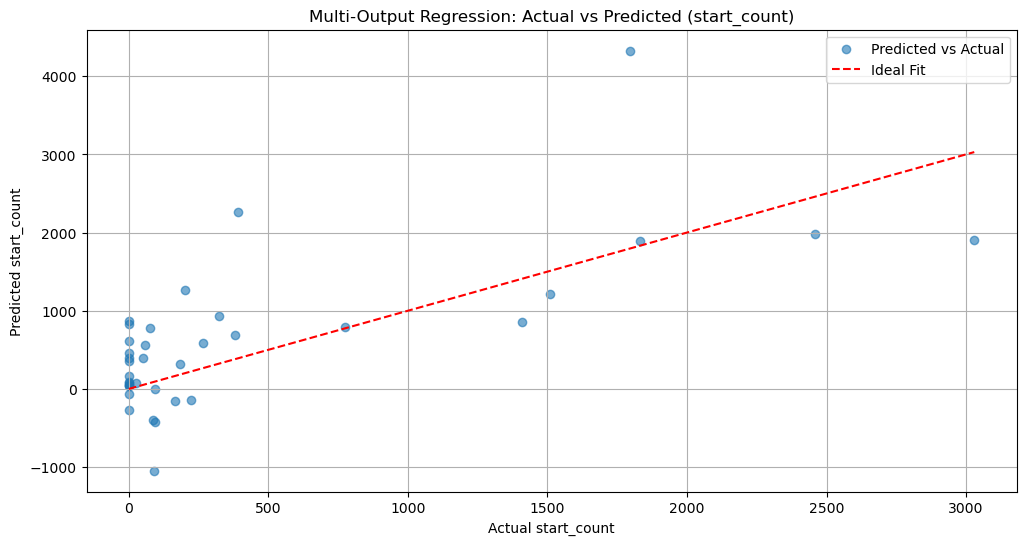

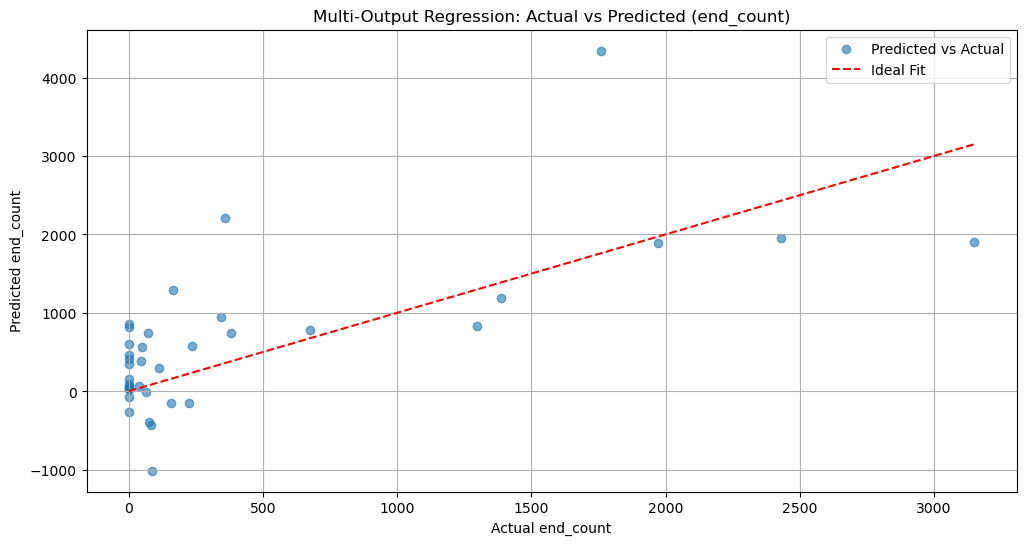

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/mengzi/Desktop/TUD/RNDq2/TIL-4030-groupwork2/data/SanFrancisco/grid_with_bike_counts.csv')# use absolute path here

# Separate features (X) and target variables (Y)
X = data.drop(columns=['geometry', 'start_count', 'end_count'])  # Features
Y = data[['start_count', 'end_count']]  # Target variables (two outputs)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multi-output linear regression model
multi_output_model = MultiOutputRegressor(LinearRegression())
multi_output_model.fit(X_train, Y_train)  # Fit the model to the training data

# Make predictions on the test set
Y_pred = multi_output_model.predict(X_test)

# Evaluate the model for start_count
mse_start = mean_squared_error(Y_test['start_count'], Y_pred[:, 0])
r2_start = r2_score(Y_test['start_count'], Y_pred[:, 0])

# Evaluate the model for end_count
mse_end = mean_squared_error(Y_test['end_count'], Y_pred[:, 1])
r2_end = r2_score(Y_test['end_count'], Y_pred[:, 1])

# Print the evaluation results
print("Multi-Output Linear Regression Results:")
print({
    "start_count": {"MSE": mse_start, "R2": r2_start},
    "end_count": {"MSE": mse_end, "R2": r2_end}
})

# Plot actual vs. predicted for start_count
plt.figure(figsize=(12, 6))
plt.scatter(Y_test['start_count'], Y_pred[:, 0], alpha=0.6, label='Predicted vs Actual')
plt.plot([Y_test['start_count'].min(), Y_test['start_count'].max()], 
         [Y_test['start_count'].min(), Y_test['start_count'].max()], 
         'r--', label='Ideal Fit')
plt.xlabel('Actual start_count')
plt.ylabel('Predicted start_count')
plt.title('Multi-Output Regression: Actual vs Predicted (start_count)')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted for end_count
plt.figure(figsize=(12, 6))
plt.scatter(Y_test['end_count'], Y_pred[:, 1], alpha=0.6, label='Predicted vs Actual')
plt.plot([Y_test['end_count'].min(), Y_test['end_count'].max()], 
         [Y_test['end_count'].min(), Y_test['end_count'].max()], 
         'r--', label='Ideal Fit')
plt.xlabel('Actual end_count')
plt.ylabel('Predicted end_count')
plt.title('Multi-Output Regression: Actual vs Predicted (end_count)')
plt.legend()
plt.grid(True)
plt.show()


# Random forest model

Random Forest Multi-Output Regression Results:
{'start_count': {'MSE': 509971.48771351366, 'R2': 0.09338366864416892}, 'end_count': {'MSE': 562147.5494513514, 'R2': 0.02090047701643072}}


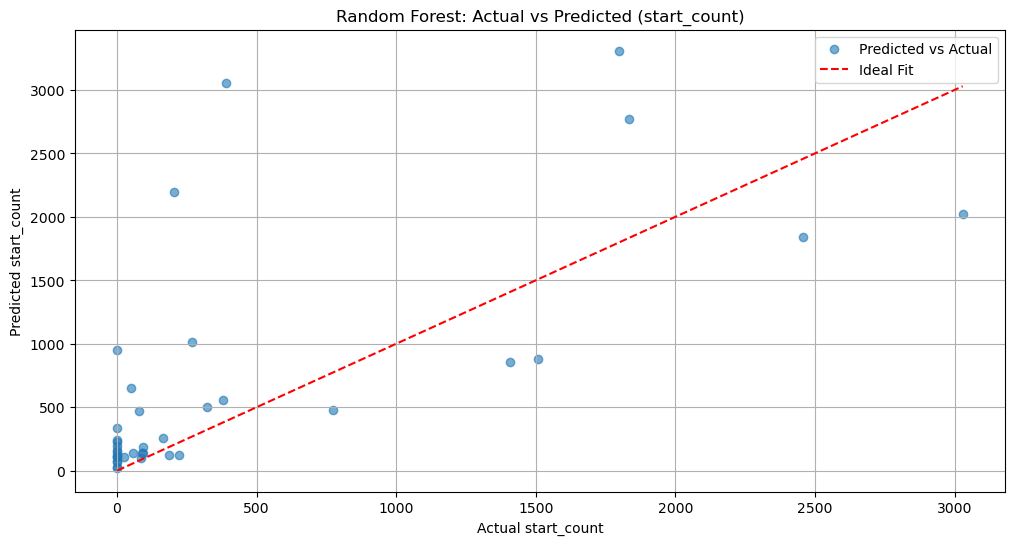

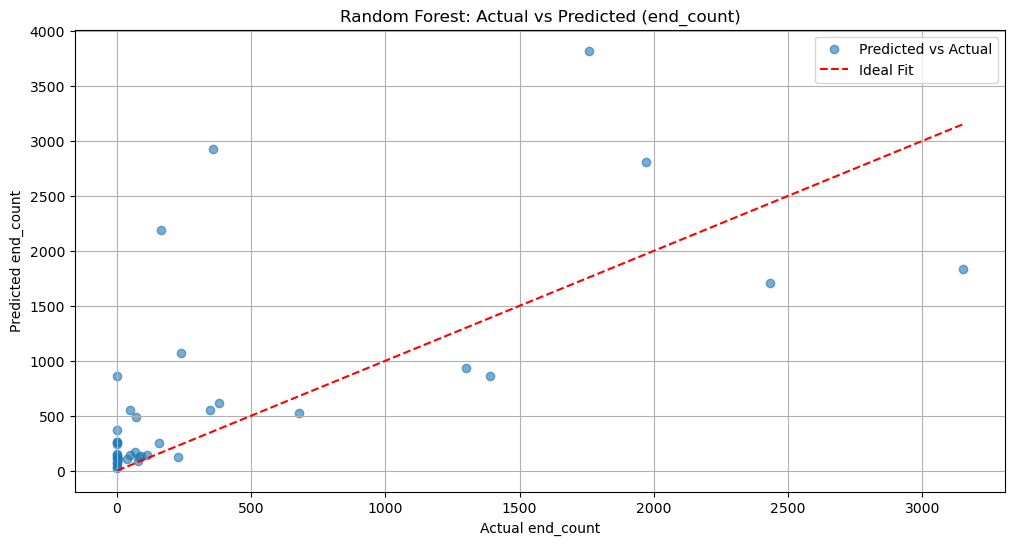

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Random Forest Multi-Output Regression
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, Y_train)

# Predict
Y_pred_rf = rf_model.predict(X_test)

# Evaluate start_count
mse_start_rf = mean_squared_error(Y_test['start_count'], Y_pred_rf[:, 0])
r2_start_rf = r2_score(Y_test['start_count'], Y_pred_rf[:, 0])

# Evaluate end_count
mse_end_rf = mean_squared_error(Y_test['end_count'], Y_pred_rf[:, 1])
r2_end_rf = r2_score(Y_test['end_count'], Y_pred_rf[:, 1])

# Print results
print("Random Forest Multi-Output Regression Results:")
print({
    "start_count": {"MSE": mse_start_rf, "R2": r2_start_rf},
    "end_count": {"MSE": mse_end_rf, "R2": r2_end_rf}
})

# Plot for start_count
plt.figure(figsize=(12, 6))
plt.scatter(Y_test['start_count'], Y_pred_rf[:, 0], alpha=0.6, label='Predicted vs Actual')
plt.plot([Y_test['start_count'].min(), Y_test['start_count'].max()], 
         [Y_test['start_count'].min(), Y_test['start_count'].max()], 
         'r--', label='Ideal Fit')
plt.xlabel('Actual start_count')
plt.ylabel('Predicted start_count')
plt.title('Random Forest: Actual vs Predicted (start_count)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for end_count
plt.figure(figsize=(12, 6))
plt.scatter(Y_test['end_count'], Y_pred_rf[:, 1], alpha=0.6, label='Predicted vs Actual')
plt.plot([Y_test['end_count'].min(), Y_test['end_count'].max()], 
         [Y_test['end_count'].min(), Y_test['end_count'].max()], 
         'r--', label='Ideal Fit')
plt.xlabel('Actual end_count')
plt.ylabel('Predicted end_count')
plt.title('Random Forest: Actual vs Predicted (end_count)')
plt.legend()
plt.grid(True)
plt.show()


# XGBoost model